# Project: Investigate the turn up event of patients appointments in Brasil

## Table of Content

<li><a href='#intro'>Introduction</a></li>
<li><a href='#wrangling'>Data Wrangling</a></li>
<li><a href='#eda'>Exploratory Data Analysis</a></li>
<li><a href='#conclusion'>Conclusion</a></li>
<li><a href='#limitation'>Limitations</a></li>



<a id='intro'></a>
# Introduction

In this project we will be carrying analysis related to the turn up event of patients to their appointment across different neighborhood in Brasil. We will be answering related question that would be raised after taking an overview of the dataset in order to give us insights as to why patients may or may not show up for their appoinment. 

We would like to get answers to questions like;

<li> What is the percentage of patients that show up to those who do not show up?</li>
<li> Does age have an effect on predicting the turn up?
<li> Does time interval of the scheduled date and appointment date influence the turn up?
<li> Do patient with scholarship tend to show up more?
<li> Do patient with illness/Disability tend to show up more?
<li> Does neighborhood have an impact on the turnup?
<li> Does sending SMS alert help patients show up more?
<li>Do Alcoholic patient show up more?

Let's dive in to answer these questions. We will start by importing required modules and the dataset that would be used in this analysis.


In [249]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [250]:
df=pd.read_csv("noshowappointments-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
# Data wrangling

In this section, we are going to be looking at our dataset to check for abnormalities like missing values, incorrect spellings e.t.c. We would be cleaning and manipulating the data to suit our purpose. 

### General properties

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We have a total of 14 columns and 110527 rows of which there are no missing values. We can observe hypertension and handicap columns are not correctly  and from the look of the questions we may not be needing the "patientID" column to answer the questions since we already have the appointment ID.

In [252]:
df.describe(include="all")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


The age column seems to have -1 as its minimum, this value should be replaced or removed. We can also observe that the amount of people that showed up for the appointment is quite high. Handcap has a maximum value of 4, which should either be 0 or 1.

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

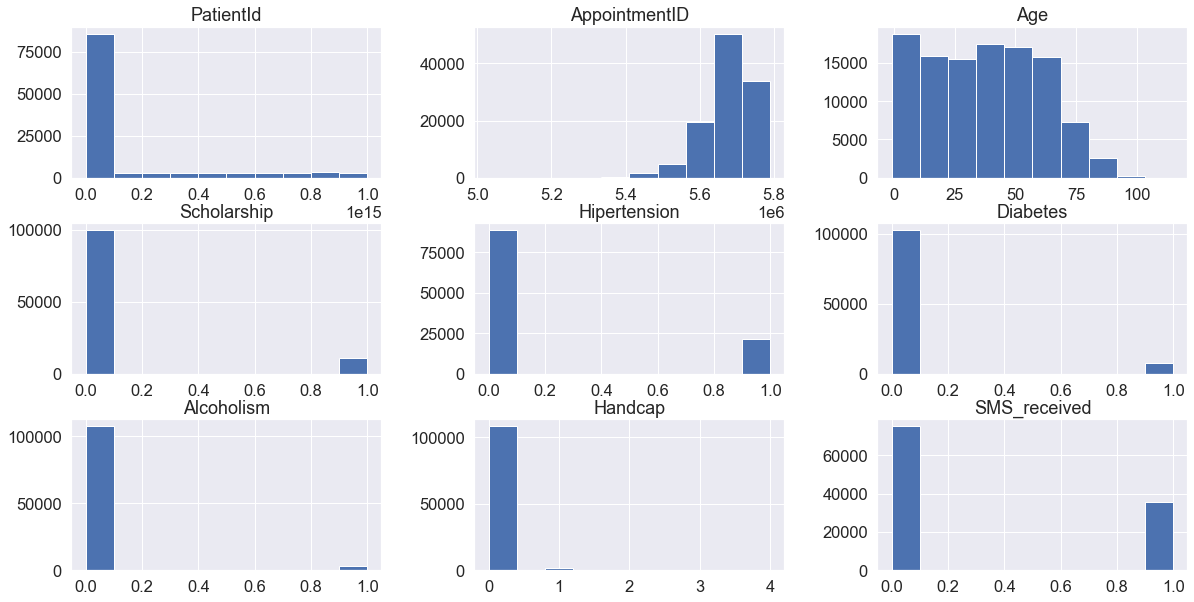

In [253]:
df.hist(figsize=(20, 10))

All the column values are not showing a wide range of distribution except for the age column. We can also confirm that Handcap has its values spread from 0-4 instead of just 0 and 1.

### Data Cleaning and Manupulation

In [254]:
# Drop 'PatientID' column
df.drop(['PatientId'], axis = 1, inplace=True)

In [255]:
# Checking for unique values
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [256]:
# Replace incorrect values in Handicap column to the most frequent value
df=df.replace({'Handcap' : { 2 : 0, 3 : 0, 4 : 0}})

In [257]:
# Replace incorrectly spelt column names
df.rename(columns = {'Handcap':'Handicap', 'Hipertension':'Hypertension'}, inplace = True)
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [258]:
# Extract the date from 'ScheduledDay' and 'AppointmentDay' column
df['ScheduledDate']=df['ScheduledDay'].apply(lambda x: x[:10])
df['AppointmentDate']=df['AppointmentDay'].apply(lambda x: x[:10])

In [259]:
#Replace -1 with 0 in the Age column
df['Age']=df['Age'].replace(-1, 0) 

# Create Age categories based on age column
def age_cat(x):
    if x>=0 and x<11:
        return "0-10"
    elif x>=11 and x<21:
        return "11-20"
    elif x>=21 and x<31:
        return "21-30"
    elif x>=31 and x<41:
        return "31-40"
    elif x>=41 and x<61:
        return "41-60"
    elif x>=61:
        return "61 and above"

df['Age_category']=df['Age'].apply(lambda x: age_cat(x))

<a id='eda'></a>
# Exploratory Data Analysis

### What is the percentage of patients that showed up to those who did not show up?

Finding out the percentage of people who turned up would determine how we would narrow down the problem. For instance, if the turn up is quite low, it would be quite alarming and it could mean alot of things are wrong and hence the approach to understanding the problem might be different.

We would start by getting the number of patients who turned up and who didnt by using the value_count function. We can then go ahead and find the percentage which would then give a relatable proportion.

In [260]:
j=df['No-show'].value_counts()
turnUp="{:.2f}".format((j[0]/sum(j))*100)
NoTurnUp="{:.2f}".format((j[1]/sum(j))*100)
print('The percentage of people that turned up;', turnUp, '%\nThe percentage of people that did not turned up;', NoTurnUp,'%' )

The percentage of people that turned up; 79.81 %
The percentage of people that did not turned up; 20.19 %


We can see that the percentage turn up is quite high. This could mean overall, it is condusive for patients to show up, however, we would want to know possible reasons why those 20.19% of patients did not show up

### Does age have an effect on predicting the turn up?

Age could be a typical determining factor as it is possible that some illness is associated with age and may therefore lead to more turn up for that prominent age group. 

This analysis will be done by grouping the data according to those that showed up and those that didnt. We will then find the percentage of the age groups in each of the grouped data. This will give us the proportion of the age categories in the two groups. 


In [261]:
# Find the percentage distribution of patients that turned up based on age category
j=df[(df['No-show']=="No")]['Age_category'].value_counts()
m=j[0]+j[1]+j[2]+j[3]+j[4]+j[5]
(j/m)*100

41-60           27.763922
61 and above    18.996009
0-10            16.962180
31-40           13.400145
21-30           11.777843
11-20           11.099900
Name: Age_category, dtype: float64

In [262]:
# Find the percentage distribution of patients that did not turn up
j=df[(df['No-show']=="Yes")]['Age_category'].value_counts()
m=j[0]+j[1]+j[2]+j[3]+j[4]+j[5]
(j/m)*100

41-60           25.050405
0-10            16.972087
21-30           15.206774
11-20           14.821453
31-40           14.480936
61 and above    13.468345
Name: Age_category, dtype: float64

The percent proportion of the age category seems to differ a bit in the two groups. Lets create a dataframe for them and make a visual representation of them

In [263]:
#create indidual dataframe of each category and merge them

#Age Category of patients that turned up
data_1 = [['0-10', 16.972,'Yes'], ['11-20', 14.821,'Yes'], ['21-30', 15.207,'Yes'] , ['31-40', 14.481,'Yes'], ['41-60', 25.050,'Yes'], ['61 and above', 13.468,'Yes']]
age_1 = pd.DataFrame(data_1, columns = ['Age Category', 'Percent', 'No-show'])

#Age Category of patients that did not turn up
data_2 = [['0-10', 16.961,'No'], ['11-20', 11.100,'No'], ['21-30', 11.778,'No'] , ['31-40', 13.400,'No'], ['41-60', 27.764,'No'], ['61 and above', 18.996,'No']]
age_2 = pd.DataFrame(data_2, columns = ['Age Category', 'Percent', 'No-show'])

#merge dataframes
frames = [age_1, age_2]
result = pd.concat(frames)
result

,Age Category,Percent,No-show
0,0-10,16.972,Yes
1,11-20,14.821,Yes
2,21-30,15.207,Yes
3,31-40,14.481,Yes
4,41-60,25.050,Yes
5,61 and above,13.468,Yes
0,0-10,16.961,No
1,11-20,11.100,No
2,21-30,11.778,No
3,31-40,13.400,No


[Text(0.5, 1.0, 'Bar plot comparing the percent distribution of the age category between the turn up values.')]

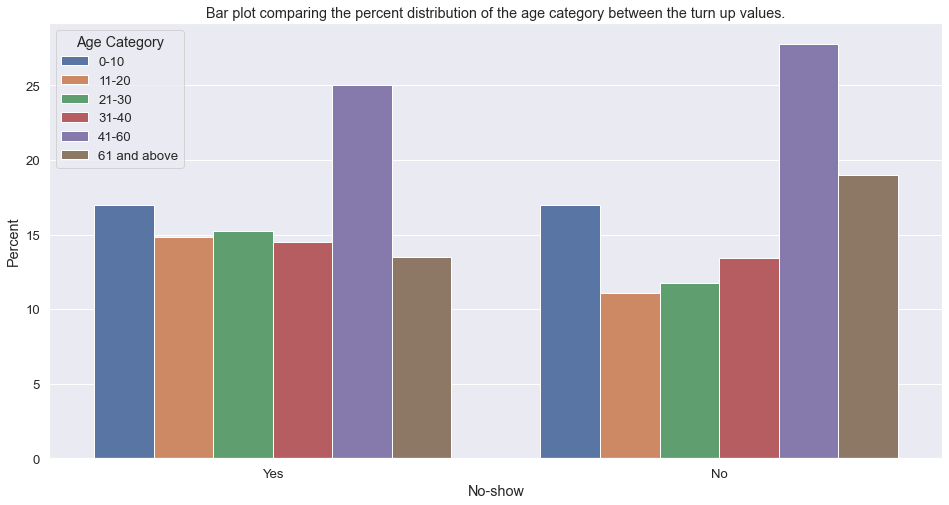

In [264]:
# Create the visual representation of the new dataframe

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(16, 8)},font_scale = 1.2)
sns.barplot(x="No-show", y="Percent", hue="Age Category", data=result).set(title='Bar plot comparing the percent distribution of the age category between the turn up values.')

We observe that the percentage of people above 40 is a bit higher for those who turned up compared to those who didnt. It could be associated with the fact that the older patients tend to fall ill compared to the younger patients and hence it influences their turn up. This leads us to the next question.

### Do patient with illness/Disability tend to show up more?

Ordinarily there is a high tendency for patients being diagnosed with an illness to show up for their appointments. We would be looking to see if this would be similar in this data. 

We would go about the analysis by carrying out some manipulations with the data. We would be looking to check through the rows for patients who has either hypertension, diabetes or is disabled and they would be assigned '1' value in a new column called 'disabled/Ill'. The same manipulation would be done with patients who has none of these illness or disability, and they will be assigned a '0' in the new 'disabled/Ill' column. These two new dataframes would be merged together after the analysis.

In [265]:
# Create seperate data set for patient diagnosed with hypertension, Diabetes,or those that are handicapped

disabled=df[(df['Hypertension']==1) | (df['Diabetes']==1) | (df['Handicap']==1)]

# Create seperate data set for patient diagnosed with hypertension, Diabetes,or those that are handicapped
no_disabled=df[(df['Hypertension']==0) & (df['Diabetes']==0) & (df['Handicap']==0)]

# Create new column to tell if a patient is ill or disabled for the splitted data created above 

ill = np.repeat(1,disabled.shape[0])
not_ill = np.repeat(0,no_disabled.shape[0])
disabled['disabled/Ill']=ill
no_disabled['disabled/Ill']=not_ill

# Merge the two new data together
df=pd.concat([disabled,no_disabled])
df.head()


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDate,AppointmentDate,Age_category,disabled/Ill
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,61 and above,1
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,41-60,1
5,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,2016-04-29,61 and above,1
25,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No,2016-04-26,2016-04-29,41-60,1
26,5641781,F,2016-04-29T14:19:42Z,2016-04-29T00:00:00Z,45,BENTO FERREIRA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,41-60,1


Having done that, we would be using the groupby function to group the turn up based on the mean of the ill/disabled. We would then convert it to percent by multiplying by 100. Mean will be used in this case we are dealing with data containing zeros and ones. The average of values of 0's and 1's, when multiplied by 100 give percentage of the 1's. This percentage tell us the proportion of ill/disabled in the No-show column. 

In [266]:
j=list(df.groupby('No-show')['disabled/Ill'].mean()*100)
m=['No','Yes']
dg=pd.DataFrame({'No-show':m,'percent ill/disabled':j})
dg

,No-show,percent ill/disabled
0,No,22.780247
1,Yes,19.189928


We would create a visual to represent this analysis.

[Text(0.5, 1.0, 'Bar plot of the percent value of disabled/ill to the No-show values.')]

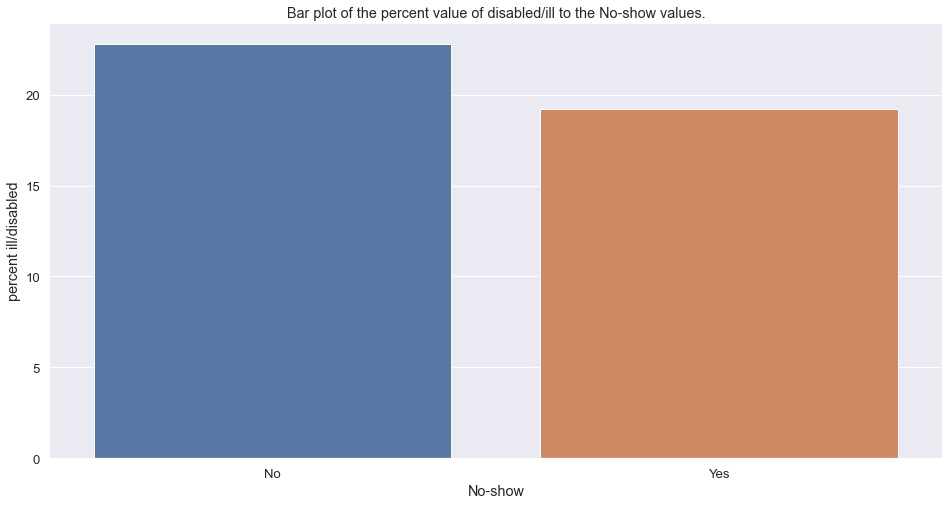

In [267]:
# Create a visual
sns.set(rc={"figure.figsize":(16, 8)},font_scale = 1.2)
sns.barplot(x="No-show", y="percent ill/disabled", data=dg).set(title='Bar plot of the percent value of disabled/ill to the No-show values.')

We can observe that patients diagnosed with an illness or disability have a slightly higher percent turnup than those who dont. This further confirms what was earlier said about people tending to turn up when they are diagnosed with an illness or disability. We recall that Patients above 40 tend to show up more, let us see if they have a higher percent of disabled/ill patients among them.

As explained earlier, we would be applying the groupby function nd then finding the percentage distribution of the ill/disabled among the age category. We would then make a plot of the result

[Text(0.5, 1.0, 'Plot showing the percentage of ill/disabled across age category')]

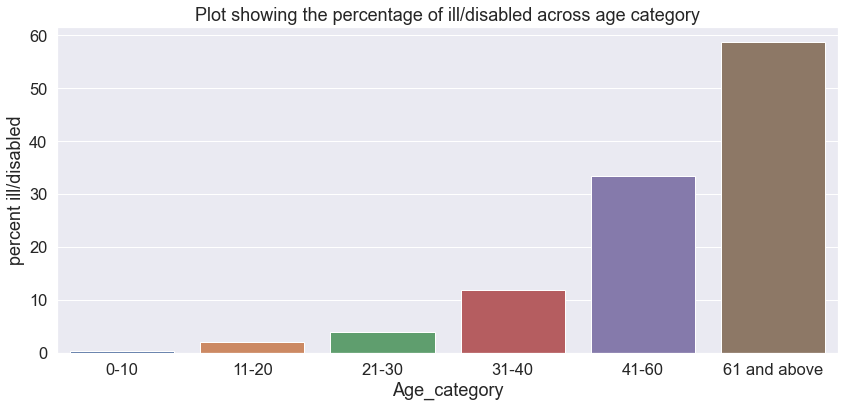

In [268]:

j=list(df.groupby('Age_category')['disabled/Ill'].mean()*100)
m=['0-10','11-20','21-30','31-40','41-60','61 and above']
dg=pd.DataFrame({'Age_category':m,'percent ill/disabled':j})
dg
# Create a visual
sns.set(rc={"figure.figsize":(14, 6)},font_scale = 1.5) 
sns.barplot(x="Age_category", y="percent ill/disabled", data=dg).set(title='Plot showing the percentage of ill/disabled across age category')


From the plots we can strongly see patients diagnosed with an illness or disabilty increases across the age category. This explains the higher turn up in older people than younger patients.

### Does time interval of the scheduled date and appointment date influence the turn up?

There is a possibility that the distance between the scheduled date and appointment might have an effect. It could be that the farther the appointment date, the higher the possibility of patients forgetting or patients feeling much better before then and hence they do not see the need to turn up.

We would start this analysis by doing some manipulation on the data. We would like to extract the date from both the 'ScheduledDate' and 'AppointmentDate' columns and then find the difference in months. This values would then be added to a new column 'Month_interval'. We would be using datetime module to split the date and then use dateutil module to find the interval between them as shown below.

In [269]:
# Lets create a column that holds the monthly interval between the scheduled date and the appointment date

from datetime import datetime
from dateutil import relativedelta

m=[]

for i in range(len(df['ScheduledDate'])):
    
    start_date = datetime.strptime(df['ScheduledDate'][i], "%Y-%m-%d")
    end_date = datetime.strptime(df['AppointmentDate'][i], "%Y-%m-%d")
    k=relativedelta.relativedelta(end_date, start_date).months
    
    m.append(k)
        
df['Month_interval']=m



In [270]:
df['Month_interval'].value_counts()

0    99636
1     8795
2     1885
3      126
5       55
4       30
Name: Month_interval, dtype: int64

We have interval between 0 and 5 months. We will be grouping these months into 'Within the month','1 month' and '2 month and above'. We would then find the percent distribution of the months interval between patients that turned up and did not turn up. This will allow for the comparison between the month interval for those who turned up and those who did not. After the analysis, we would then , create a dataframe that would hold these results.

In [271]:
# percentage distribution of time difference fixed by patients for their appointment that turned up 

j=df[(df['No-show']=="No")]['Month_interval'].value_counts()

percent_value=[]
k=j[0]+j[1]+j[2]+j[3]+j[4]+j[5]
for i in range(2):
    percent_value.append((j[i]/k)*100)
percent_value.append(((j[2]+j[3]+j[4]+j[5])/k)*100)

# percentage distribution of time difference fixed by patients for their appointment that did not turn up    
j=df[(df['No-show']=="Yes")]['Month_interval'].value_counts()
k=j[0]+j[1]+j[2]+j[3]+j[4]+j[5]
for i in range(2):
    percent_value.append((j[i]/k)*100)
percent_value.append(((j[2]+j[3]+j[4]+j[5])/k)*100)

# create dataframe for the time difference fixed by patients for their appointment
No_show=['No','No','No','Yes','Yes','Yes']
month_cat=['Within the month','1 month', '2 month and above','Within the month','1 month', '2 month and above']

month_int = pd.DataFrame({'Month Interval': month_cat,
                   'percent': percent_value,
                   'No-show': No_show})
month_int


,Month Interval,percent,No-show
0,Within the month,90.293397,No
1,1 month,7.862099,No
2,2 month and above,1.844504,No
3,Within the month,89.564945,Yes
4,1 month,8.333707,Yes
5,2 month and above,2.101349,Yes


[Text(0.5, 1.0, 'Plot of percentage distribution of the month interval against the turn up value')]

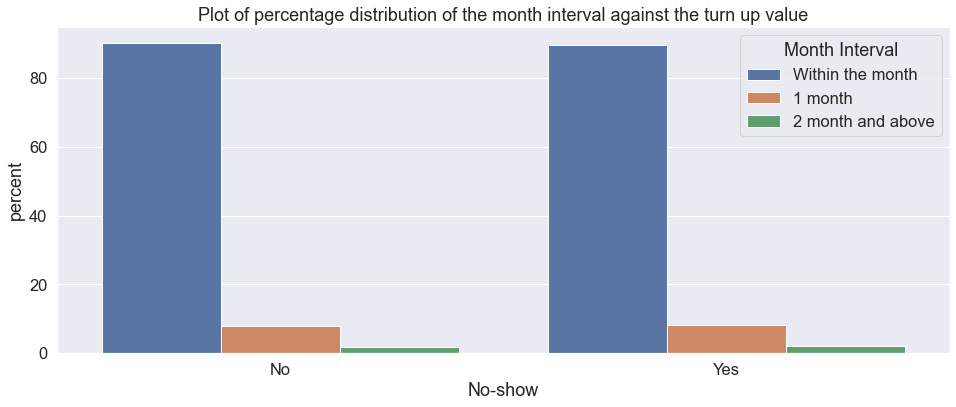

In [272]:
# Create the visual representation of the new dataframe
sns.set(rc={"figure.figsize":(16, 6)},font_scale = 1.5)


sns.barplot(x="No-show", y="percent", hue="Month Interval", data=month_int).set(title='Plot of percentage distribution of the month interval against the turn up value')

From the graph above, we can observe that the percentage of people that fixed their schedule within the same month and showed up is 90.23 while that of those that did not turn up is 89.5, this is similar to other month interval categories. Therefore, since there is no significant difference, we can say there is no effect of the time difference between their scheduled date and the appointment date.


### Do patient with scholarship tend to show up more?

There is a possibilty that little or no finance may be a factor, hence there is a tendency that if the fees are free, patients might turn up more. We would be checking for the percent distribution of scholarship betwen those that turned up to those who did not turn up. We would use the groupby function and aggregate with the mean of the scholarship, since teh value is in 0's and 1's. We would then multiply by 100.

We would plot this on a graph for visualization.

[Text(0.5, 1.0, 'Plot of percentage distribution of those with scholarship against the turn up value')]

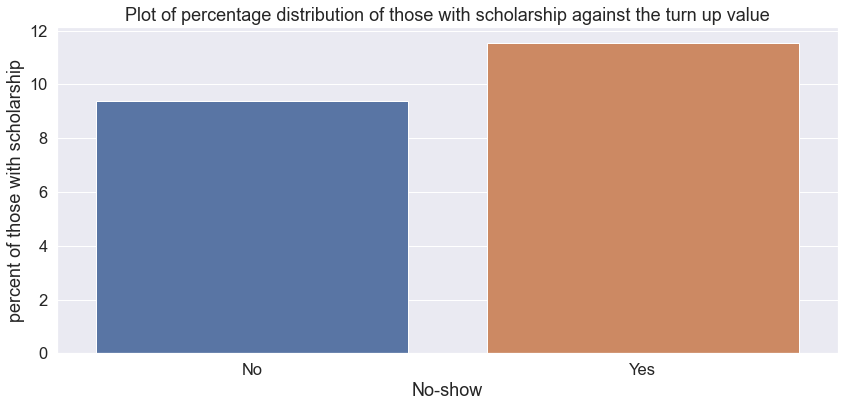

In [273]:
j=list(df.groupby('No-show')['Scholarship'].mean()*100)
m=['No','Yes']
dg=pd.DataFrame({'No-show':m,'percent of those with scholarship':j})
dg
# Create a visual
sns.set(rc={"figure.figsize":(14, 6)},font_scale = 1.5) 
sns.barplot(x="No-show", y="percent of those with scholarship", data=dg).set(title='Plot of percentage distribution of those with scholarship against the turn up value')


We observe that averagely patients who do not turn up have a higher percentage of patients under scholarship. This shows that our hypothesis that patients with scholarship would show up was wrong from this insight.

### Does sending SMS alert help patients show up more?

SMS alert could be a reminder to the patients about their upcoming appiontment or it could be a notification sent to them as soon as they schedule their appointment. If its the former, it might have an impact on the turnup. Perhaps if they get alerts they would remember their appointment in a case where they have forgotten. 

We would be checking for the percent distribution of patients who received SMS betwen those that turned up to those who did not turn up. We would again use the groupby function and aggregate with the mean of the SMS_received column, since the value is also in 0's and 1's. We would then multiply by 100.

This will be represented on a abr plot as well

,No-show,percent of those who received SMS alert
0,No,29.133412
1,Yes,43.837089


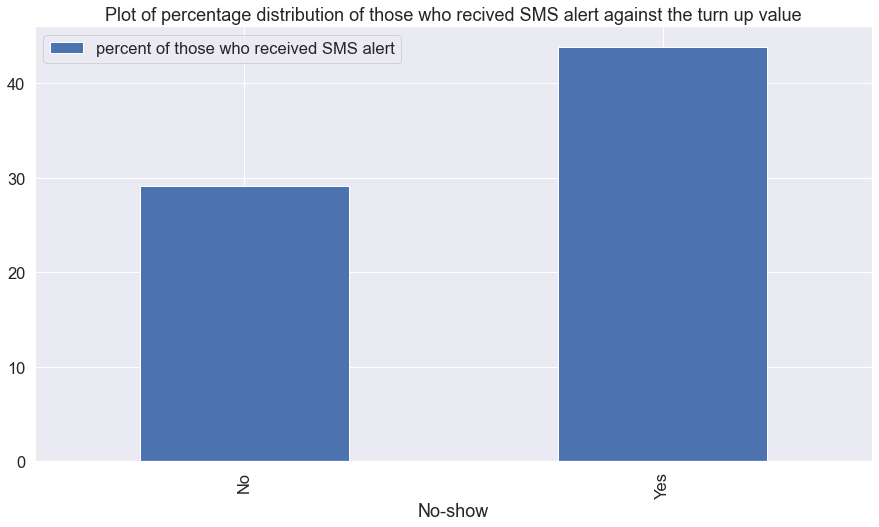

In [274]:

j=list(df.groupby('No-show')['SMS_received'].mean()*100)
m=['No','Yes']
dg=pd.DataFrame({'No-show':m,'percent of those who received SMS alert':j})


# Create a visual
dg.plot.bar(x='No-show',y='percent of those who received SMS alert', figsize=(15,8), title='Plot of percentage distribution of those who recived SMS alert against the turn up value');
dg

We can observe that sending sms doesnt really have effect on the turn up. The graph even says higher prcentage of patients who  receive SMS tend not to show up for their appointment.

### Do Alcoholic patient show up more?

Alcoholics may find it hard to turn up as they are not ready to break the addiction. Let's see if there is an effect on the turn up. We would be carrying similar analysis by using the groupby function and finding the mean an dthe percentage. This will be plotted on abr chart as well

,No-show,percent
0,No,3.041674
1,Yes,3.033290


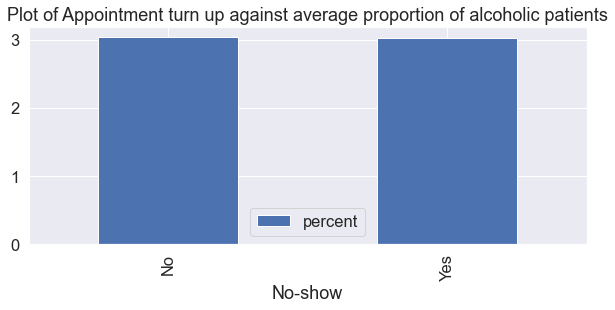

In [275]:
j=list(df.groupby('No-show')['Alcoholism'].mean()*100)
m=['No','Yes']
dg=pd.DataFrame({'No-show':m,'percent':j})


# Create a visual
dg.plot.bar(x='No-show',y='percent', figsize=(10,4), title='Plot of Appointment turn up against average proportion of alcoholic patients');
dg


We observe that there is no significant effect of Alcoholics on turn up

### Does neighborhood have  an impact on the turnup?

Ordinarily, the neighborhood might have an impact on the turn up. The distance of the patients resident to the clinic, facilities available in neighborhood, etc. Let is find the distribution of the turn up percent in the neighborhoods. Let us find out which neighborhood have a higher percent turn up.

NB: We would be looking at the top 20 neighborhood with the highest scheduled appointment in this dataset

In [276]:
# Create dataframe for patients and their turnup based on where they are located

percent_value=[]
totalLocations=[]
j=df[(df['No-show']=='No')]['Neighbourhood'].value_counts()[:20]
location=df[(df['No-show']=='No')]['Neighbourhood'].value_counts()[:20].index.tolist()
m=sum(j)
for i in range(len(j)):
    totalLocations.append(location[i])
    percent_value.append((j[i]/m)*100)

j=df[(df['No-show']=='Yes')]['Neighbourhood'].value_counts()[:20]
location=df[(df['No-show']=='Yes')]['Neighbourhood'].value_counts()[:20].index.tolist()
m=sum(j)
for i in range(len(j)):
    totalLocations.append(location[i])
    percent_value.append((j[i]/m)*100)
    
Neighborhood = pd.DataFrame({'Location': totalLocations,
                   'percent': percent_value,
                   'No-show': ['No']*20 + ['Yes']*20})
Neighborhood

,Location,percent,No-show
0,JARDIM CAMBURI,12.125444,No
1,MARIA ORTIZ,8.894319,No
2,RESISTÊNCIA,6.836563,No
3,JARDIM DA PENHA,6.295456,No
4,SANTA MARTHA,5.110452,No
5,CENTRO,5.102694,No
6,ITARARÉ,5.025116,No
7,TABUAZEIRO,4.963053,No
8,SANTO ANTÔNIO,4.387037,No
9,BONFIM,4.311398,No


[Text(0.5, 1.0, 'Plot of percentage distribution of those with scholarship against the turn up value')]

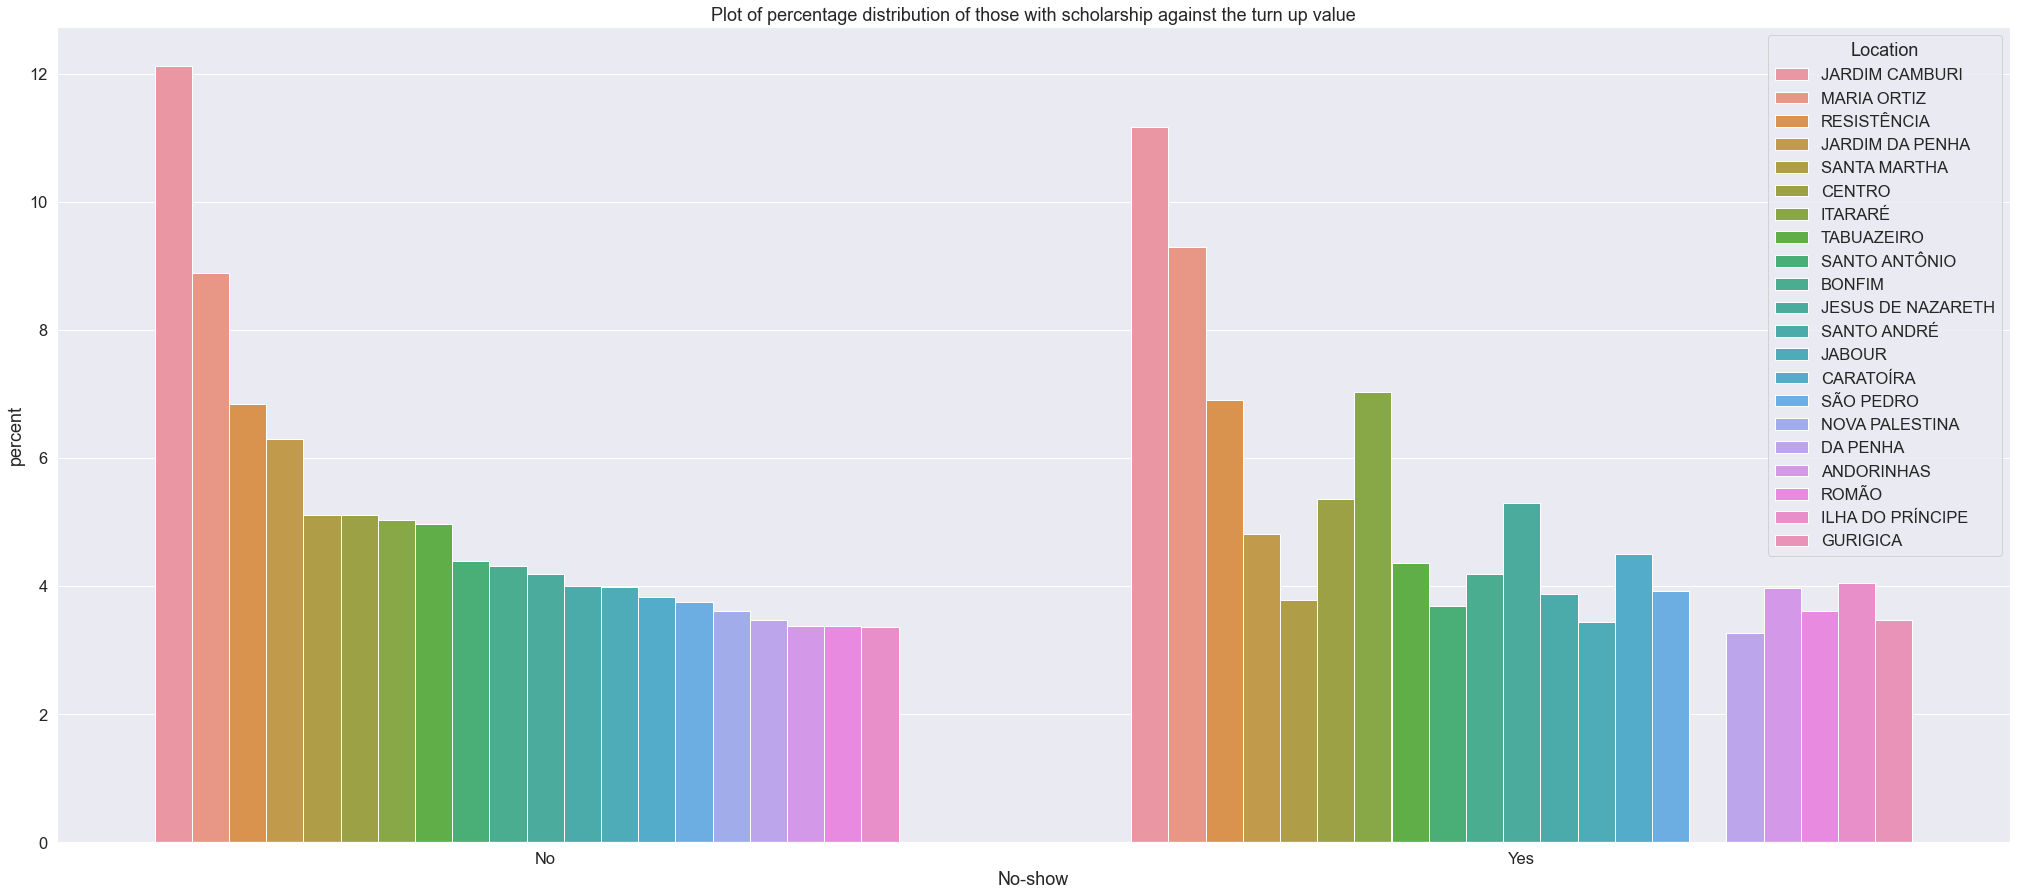

In [277]:
#
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(35, 15)},font_scale = 1.5) 

ax=sns.barplot(x="No-show", y="percent", hue="Location", data=Neighborhood).set(title='Plot of percentage distribution of those with scholarship against the turn up value')

ax

From the graph, Locations like Jardim Camburi, Jardim Da Penha, Tabuazeiro have a higher percentage of turn up of their patients showing compared to places like Itarare, Santo Andre,Ilha Do Principe that have a higher percent of no turn up compared to the turn up. 

<a id='conclusion'></a>
# Conclusion



From the investigation, we Could draw some conclusions like, people above 40 tend to show up more than the younger patients. This could be due to the fact that the higher percent of ill/disabled are among them, which we can conclude from our analysis that disabled/ill patients turn up more and as we know, hypothetically people tend to be more non chalant with health when they feel okay. Patients who turned up have lower percent of scholarship granted  to them. Also, patients who received SMS alert have a lower turn up than those who did not receive, but in the real sense it should be the other way round. Some locations show more turn up of patients than others. Based on the analysis, the farther away the appointment is fixed from the day it is scheduled, the lesser the chances of them turning up. This could be as a result of them forgetting or them feeling better and thereby thinking there is no need turning up.





<a id='limitation'></a>
# Limitations

There are some limitations to this analysis however. Not enough data was provided to further drill down possible reason for why patients did not turn up. If we had the address of patients for example, we could check the distance of the patient's residence to the appointment location. Further information on SMS alert is not given because according to the analysis, people who do not receive SMS show up more which should not be, so perhaps the mode of conveying the reminder(if the SMS alert is a reminder) or maybe the SMS alert is just basically to notify the patient as soon as their appointment is created, which would mean it might not have an impact on the turn up. It was not clear enough in the data.

### References

<li>https://www.geeksforgeeks.org/</li>
<li> https://datatofish.com/
<li> https://www.w3schools.com/
<li>https://pandas.pydata.org/pandas-docs
<li>https://numpy.org/doc/

